In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd

from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

%matplotlib inline

import sys
import warnings
warnings.filterwarnings('ignore')

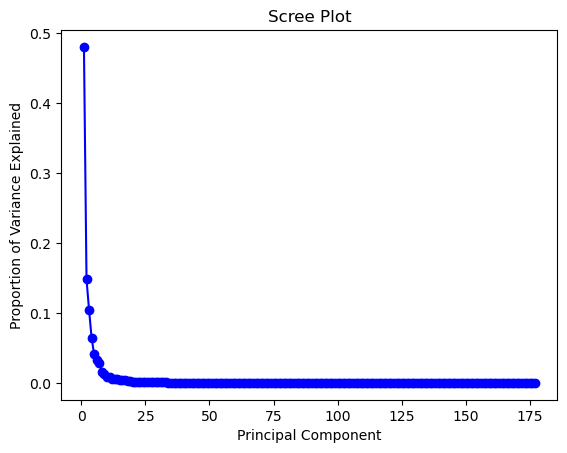

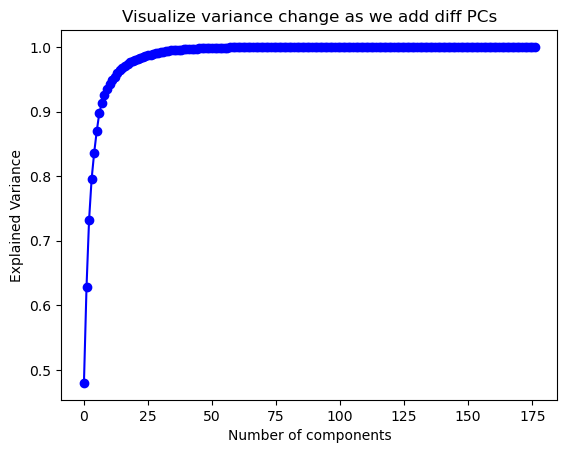

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


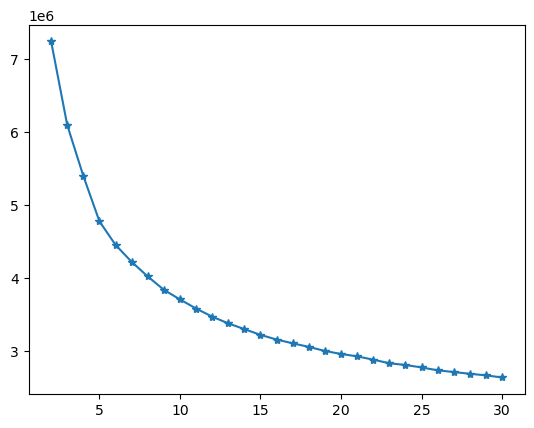

In [2]:
data = np.loadtxt("high_variance_distances.dat")
data_pts = data.copy()
data.shape

pca = PCA()
pca.fit(data)
new_data = pca.transform(data)

PC_values = np.arange(pca.n_components_) + 1

plt.title("Scree Plot")
plt.plot(PC_values, pca.explained_variance_ratio_, "bo-")
plt.xlabel("Principal Component")
plt.ylabel("Proportion of Variance Explained")
plt.show()

plt.title("Visualize variance change as we add diff PCs")
plt.ylabel("Explained Variance")
plt.xlabel("Number of components")
plt.plot(np.cumsum(pca.explained_variance_ratio_), "bo-")
plt.show()

obj_list = []
kmin = 2
kmax = 31
for k in range(kmin, kmax):
    print(k)
    kmeans = KMeans(n_clusters=k).fit(data)
    obj_min = kmeans.inertia_
    obj_list.append(obj_min)

plt.plot(np.arange(kmin, kmax), obj_list, "*-")


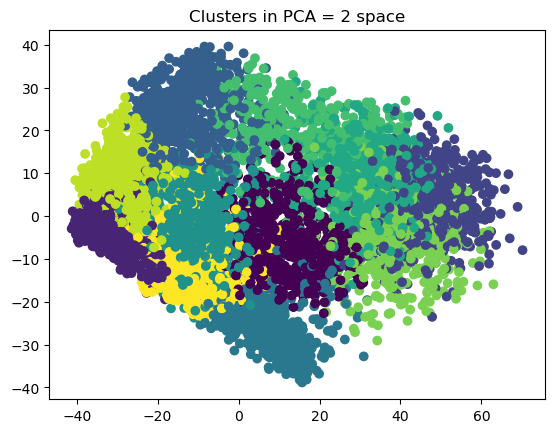

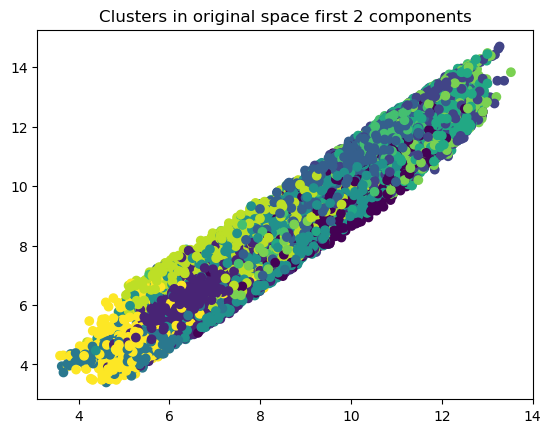

In [3]:
x = data
nc_pca = 2
pca_2 = PCA(n_components=nc_pca)
new_x = pca_2.fit_transform(x)
skm = KMeans(n_clusters=11).fit(x)
skz = skm.labels_
plt.title(f"Clusters in PCA = {nc_pca} space")
plt.scatter(new_x[:, 0], new_x[:, 1], c=skz)
plt.show()
plt.title("Clusters in original space first 2 components")
plt.scatter(x[:, 0], x[:, 1], c=skz)
plt.show()


In [4]:
class kmeans:
    def __init__(self, N_c):
        self.N_centroids = N_c

    def initialization_of_centroids_random(self):
        sel = np.random.choice(self.N_points, size=self.N_centroids, replace=False)
        return self.data[sel]

    def initialization_of_centroids_plusplus(self):
        i = rd.randint(0, self.N_points - 1)
        centroids = np.array([self.data[i]])
        for k in range(1, self.N_centroids):
            D = np.array([])
            D = np.append(D, np.min(cdist(self.data, centroids, "sqeuclidean"), axis=1))
            prob = D / np.sum(D)
            cumulative_prob = np.cumsum(prob)
            r = rd.random()
            i = 0
            for j, p in enumerate(cumulative_prob):
                if r < p:
                    i = j
                    break
            centroids = np.append(centroids, [self.data[i]], axis=0)
        return centroids

    def fit(self, data, init="random", N_max_iterations=1000):
        self.data = data
        self.N_points = np.shape(self.data)[0]

        if init == "k-means++":
            self.centroid_positions = self.initialization_of_centroids_plusplus()
        else:
            self.centroid_positions = self.initialization_of_centroids_random()

        for cnt in range(N_max_iterations):
            dist2_mat = cdist(self.data, self.centroid_positions, "sqeuclidean")
            dist2_min = np.array([np.min(dist2_mat, axis=1)])
            self.labels = np.argmin(dist2_mat, axis=1)
            loss = dist2_min.sum()
            skip = False
            for i in range(self.N_centroids):
                if len(self.data[self.labels == i]) == 0:
                    skip = True
            if skip == True:
                self.centroid_positions = self.initialization_of_centroids_random()
                continue
            new_centers = np.array([self.data[self.labels == i].mean(axis=0) for i in range(self.N_centroids)])
            if np.all(self.centroid_positions == new_centers):
                break
            self.centroid_positions = new_centers
        if cnt == N_max_iterations - 1:
            print("Max iterations reached")
        return loss, cnt, new_centers

    def plot(self):
        colors = plt.cm.get_cmap("rainbow")(np.linspace(0, 1, self.N_centroids))
        label_set = set(self.labels)
        label_count = len(label_set)
        for cen in range(self.N_centroids):
            arr_points = self.data[self.labels == cen]
            plt.scatter(arr_points[:, 0], arr_points[:, 1], color=colors[cen], s=4)
        plt.scatter(self.centroid_positions[:, 0], self.centroid_positions[:, 1], color="k")
        title_text = "No. of Points: %d, No. of Labels: %d" % (self.N_points, label_count)
        plt.title(title_text)
        plt.xlabel("x")
        plt.ylabel("y")
        plt.show()

    def get_assignation(self):
        out = np.empty((self.N_points, 3))
        for idx in range(self.N_points):
            out[idx, 0] = self.data[idx][0]
            out[idx, 1] = self.data[idx][1]
            out[idx, 2] = self.labels[idx]
        return out

    def get_centroid_positions(self):
        return self.centroid_positions


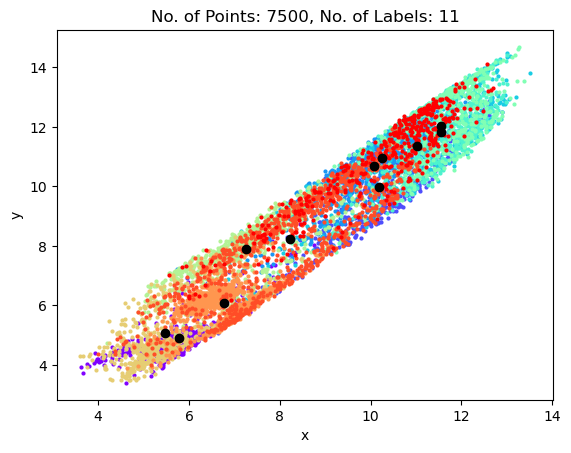

3604899.619530563 36


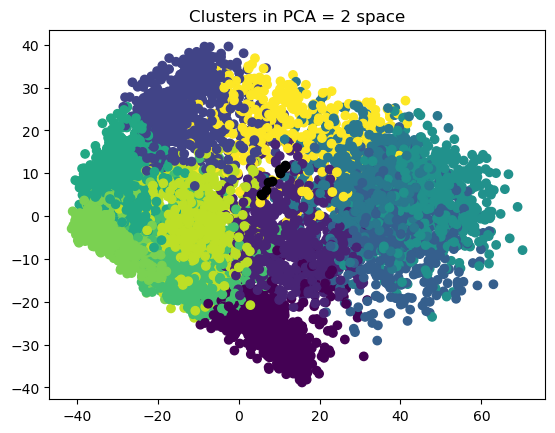

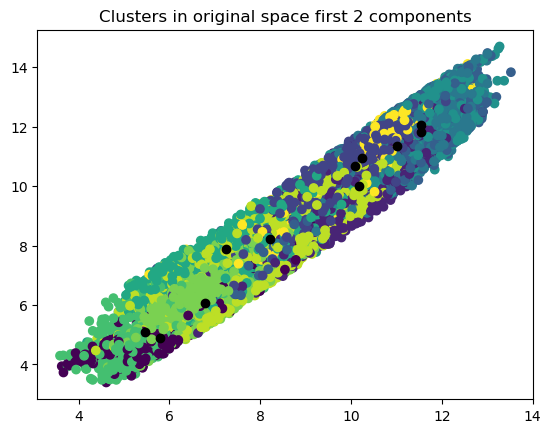

In [5]:
test_k = 11
test_km = kmeans(test_k)
loss, iteration, test_centroid_positions = test_km.fit(data)
test_km.plot()
print(loss, iteration)

test_labels = test_km.get_assignation()
# test_centroid_positions = test_km.get_centroid_positions()

plt.title(f"Clusters in PCA = {nc_pca} space")
plt.scatter(new_x[:, 0], new_x[:, 1], c=test_labels[:, 2])
plt.scatter(test_centroid_positions[:, 0], test_centroid_positions[:, 1], color="k")
plt.show()

plt.title("Clusters in original space first 2 components")
plt.scatter(test_labels[:, 0], test_labels[:, 1], c=test_labels[:, 2])
plt.scatter(test_centroid_positions[:, 0], test_centroid_positions[:, 1], color="k")
plt.show()


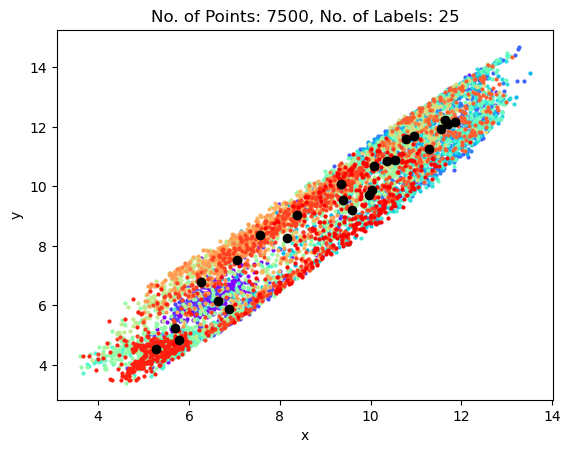

mean =  2812775.324971864
i_min =  16
min =  2778548.9046227066
avg convergence =  54.8


In [6]:
N_simulations = 30
tmp_km = kmeans(25)
min_loss = np.inf
losses = np.empty(N_simulations)
i_tmp = 0
iterations = np.empty(N_simulations)
for i in range(N_simulations):
    loss, iteration, _ = tmp_km.fit(data=data_pts, init="random")
    if loss < min_loss:
        min_loss = loss
        i_min = i
        min_km = tmp_km
    # print(i, loss, iteration)
    losses[i] = loss
    iterations[i] = iteration

min_km.plot()
print("mean = ", losses.mean())
print("i_min = ", i_min)
print("min = ", losses[i_min])
print("avg convergence = ", iterations.mean())
plt.show()


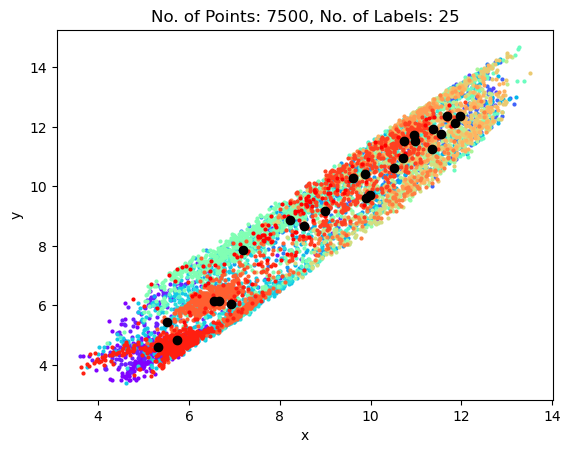

mean =  2801440.4367528637
i_min =  4
min =  2780400.1450226074
avg convergence =  46.766666666666666


In [7]:
N_simulations = 30
tmp_kmpp = kmeans(25)
min_loss = np.inf
losses = np.empty(N_simulations)
i_tmp = 0
iterations = np.empty(N_simulations)
for i in range(N_simulations):
    loss, iteration, _ = tmp_kmpp.fit(data=data_pts, init="k-means++")
    if loss < min_loss:
        min_loss = loss
        i_min = i
        min_kmpp = tmp_kmpp
    # print(i,loss,iteration)
    losses[i] = loss
    iterations[i] = iteration

min_kmpp.plot()
print("mean = ", losses.mean())
print("i_min = ", i_min)
print("min = ", losses[i_min])
print("avg convergence = ", iterations.mean())
plt.show()


2 7238885.206879026
3 6094788.565800704
4 5398179.831369365
5 4777464.9832361415
6 4454983.75607347
7 4222996.097416623
8 4023218.7923742607
9 3840983.6861593425
10 3708878.913772672
11 3591865.6754313568
12 3500277.319361829
13 3381392.304712357
14 3302477.2357900525
15 3224056.518250375
16 3167982.639782734
17 3110939.3000306347
18 3060736.6301151053
19 3004540.2941255025
20 2973677.08785145
21 2914326.4063821677
22 2897078.704047705
23 2844755.603664082
24 2821005.2759976955
25 2783431.546920677
26 2752530.155011736
27 2739077.811602762
28 2693221.822739185
29 2666780.0041902
30 2652908.687409376


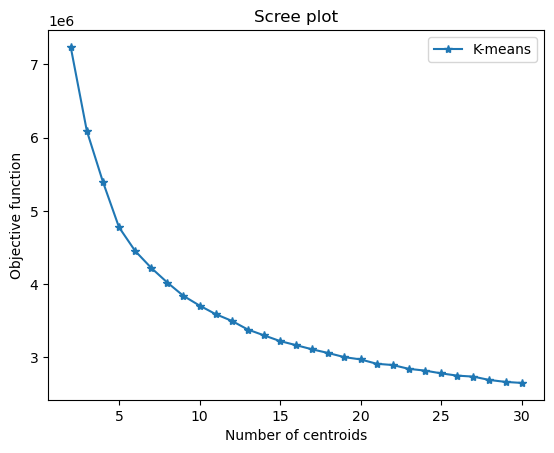

In [8]:
N_simulations = 10

res_k = list()

for n_c in range(2, 31):
    tmp_km = kmeans(n_c)
    min_loss = sys.maxsize
    losses = np.empty(N_simulations)
    i_tmp = 0
    iterations = np.empty(N_simulations)
    for i in range(N_simulations):
        loss, iteration, _ = tmp_km.fit(data=data_pts)
        if loss < min_loss:
            min_loss = loss
            i_min = i
            min_km = tmp_km
        losses[i] = loss
        iterations[i] = iteration
    print(n_c, losses[i_min])
    res_k.append([n_c, losses[i_min]])

res_k = np.array(res_k)
plt.plot(res_k[:, 0], res_k[:, 1], "*-", label="K-means")
plt.title("Scree plot")
plt.ylabel("Objective function")
plt.xlabel("Number of centroids")
plt.legend()


In [8]:
def tm(data, labels, k, tau):
    pi = np.zeros((k, k))
    for i in range(data.shape[0] - tau):
        a = labels[i]
        b = labels[i + tau]
        pi[a, b] += 1

    # print(pi)
    # print(np.sum(pi,axis=1,keepdims=True))

    pi = pi / np.sum(pi, axis=1, keepdims=True)

    # Check properties of a stochastic matrix
    # 1. All elements are nonzero
    # 2. sum_(alpha) Pi(alpha,beta) = 1 (for all beta)
    # assert (np.size(np.where(pi == 0)[0]) == 0)
    assert np.allclose(np.sum(pi, axis=1), 1.0, atol=1.0e-08)
    # print(pi)

    eigvals, eigvecs = np.linalg.eig(pi.T)

    sorted_index = np.argsort(eigvals)[::-1]
    sorted_eigvals = eigvals[sorted_index]
    sorted_eigvecs = eigvecs[:, sorted_index]

    # Make a plot for eigenvalues
    plt.plot(sorted_eigvals, "b.")
    plt.title("Sorted Eigenvalues")
    plt.xlabel(r"l")
    plt.ylabel(r"$\tau$ number")

    statdist = eigvecs[:, np.isclose(eigvals, 1)].ravel()
    statdist /= np.sum(statdist)
    # relaxation_timescales = -tau / np.log(np.abs(eigvals[np.isclose(eigvals, 1)==False]))

    return sorted_eigvals, sorted_eigvecs, statdist


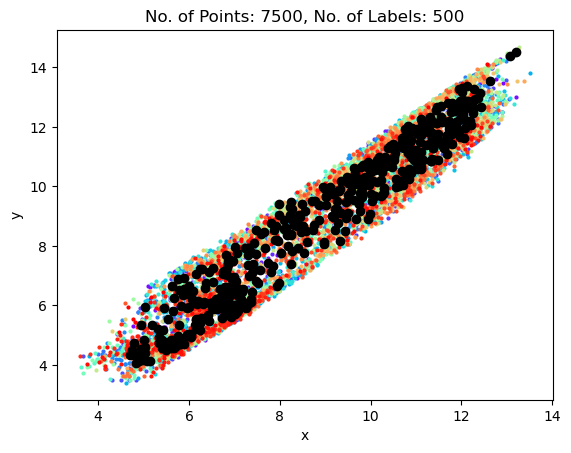

1231997.1117738322 17


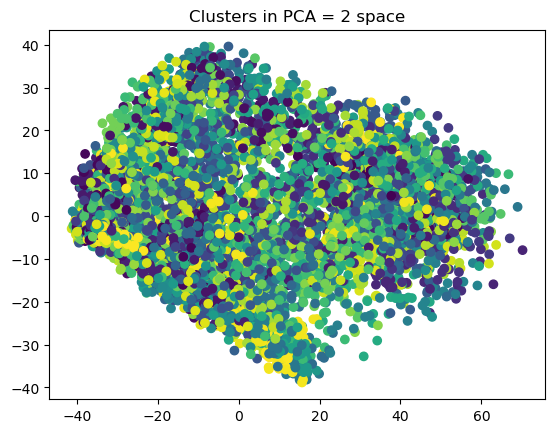

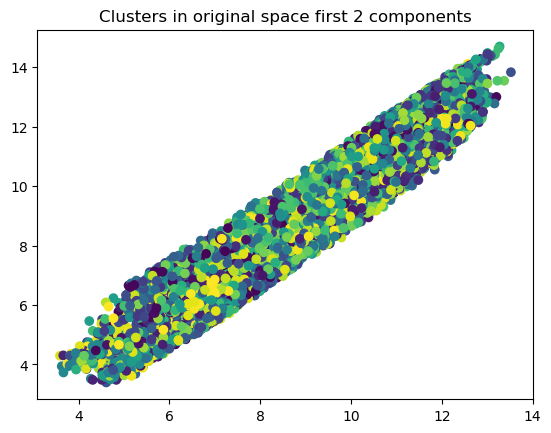

(500, 177)


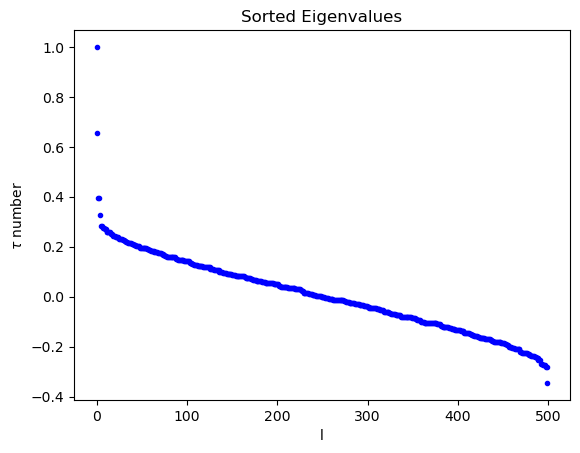

In [9]:
test_k = 500
test_km = kmeans(test_k)
loss, iteration, test_centroid_positions = test_km.fit(data)
test_km.plot()
print(loss, iteration)

test_labels = test_km.get_assignation()

plt.title(f"Clusters in PCA = {nc_pca} space")
plt.scatter(new_x[:, 0], new_x[:, 1], c=test_labels[:, 2])
plt.show()

plt.title("Clusters in original space first 2 components")
plt.scatter(test_labels[:, 0], test_labels[:, 1], c=test_labels[:, 2])
plt.show()

test_tau = 100
eval, evec, sd = tm(data_pts, test_labels[:, 2].astype(np.int64), test_k, test_tau)

# test_centroid_positions = test_km.get_centroid_positions()
print(test_centroid_positions.shape)


[0.00078638-0.j 0.00106116-0.j 0.00237433-0.j 0.00426282-0.j
 0.00191386-0.j 0.00208473-0.j 0.00151113-0.j 0.00328173-0.j
 0.00233333-0.j 0.00245579-0.j 0.00111112-0.j 0.00305305-0.j
 0.00416075-0.j 0.00261384-0.j 0.00119297-0.j 0.0007819 -0.j
 0.00283634-0.j 0.00266306-0.j 0.00222185-0.j 0.00362397-0.j
 0.00070613-0.j 0.00134132-0.j 0.00173526-0.j 0.00181919-0.j
 0.00125783-0.j 0.00315286-0.j 0.00126569-0.j 0.00186469-0.j
 0.00067384-0.j 0.00331979-0.j 0.00170414-0.j 0.00370259-0.j
 0.00045495-0.j 0.00203418-0.j 0.00332169-0.j 0.0028702 -0.j
 0.00353208-0.j 0.00166954-0.j 0.00195243-0.j 0.00185507-0.j
 0.00145466-0.j 0.00352377-0.j 0.00164817-0.j 0.00202426-0.j
 0.00276648-0.j 0.0028563 -0.j 0.00461608-0.j 0.0004161 -0.j
 0.00144981-0.j 0.00026834-0.j 0.00493511-0.j 0.00117699-0.j
 0.00249835-0.j 0.0010732 -0.j 0.00224041-0.j 0.00054201-0.j
 0.00099617-0.j 0.00172246-0.j 0.00146797-0.j 0.00123274-0.j
 0.00190704-0.j 0.00556421-0.j 0.00234471-0.j 0.00128973-0.j
 0.00196844-0.j 0.001180

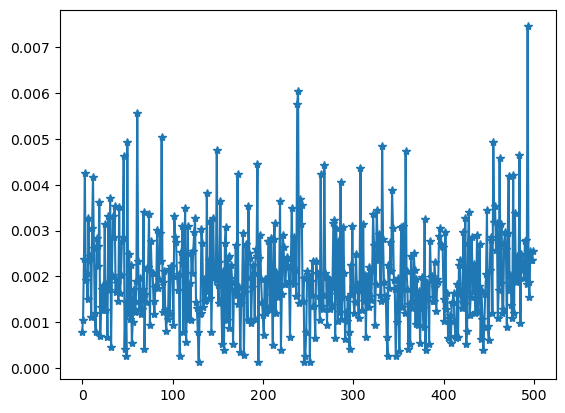

In [10]:
# print(evec)
# aaaa = evec[:, np.isclose(eval, 1)].ravel()
# print(aaaa)
# aaaa /= np.sum(aaaa)
# print(aaaa)

print(sd)

plt.plot(sd, "*-")


In [11]:
# Choose the number of Markov states based on the spectral gap
spectral_gap = eval[0] - eval[1]
num_states = np.sum(eval > spectral_gap)

print(spectral_gap)
print(num_states)


(0.34564054050141946+0j)
4


In [15]:
# Inspect the sign of the leading eigenvectors to identify the Markov states
markov_states = np.zeros(test_k)
for i in range(test_k):
    if evec[i, 1] > 0: 
        # evec[:,1] corresponds to the first eigenvector with a non=1 eigenvalue
        # since log of the eigval is taken, so that eigenvector (evec[:,0], eigval=1) is ignored
        markov_states[i] = 1
        # print(evec[i,0])
    else:
        markov_states[i] = -1
        # print(evec[i,0])

print(markov_states)
# print(evec)

# right eigenvectors of Pi sum to 0 except the one corresponding to eigval=1
print(evec.sum(axis=0))
np.isclose(evec.sum(axis=0), 0.0, atol=1.0e-08)


[ 1.  1. -1. -1. -1.  1. -1.  1. -1. -1. -1.  1.  1. -1.  1.  1.  1.  1.
 -1.  1.  1.  1. -1. -1. -1. -1.  1. -1.  1.  1.  1. -1. -1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1. -1.  1.  1. -1.  1.  1. -1. -1.  1. -1.  1.
  1.  1. -1. -1.  1.  1.  1. -1.  1.  1.  1.  1.  1. -1.  1.  1. -1.  1.
  1.  1.  1.  1. -1.  1. -1. -1.  1. -1.  1.  1.  1.  1. -1.  1.  1.  1.
 -1.  1.  1.  1. -1.  1.  1.  1.  1. -1.  1.  1. -1.  1.  1. -1.  1. -1.
  1.  1.  1.  1.  1.  1.  1. -1. -1.  1.  1. -1.  1.  1.  1. -1. -1.  1.
  1. -1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1. -1.  1.  1. -1. -1.  1.  1.  1. -1.  1.  1.  1.  1.  1. -1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1.  1.  1.  1.  1.  1.  1. -1.
  1.  1.  1.  1. -1.  1. -1.  1.  1.  1.  1. -1. -1.  1.  1.  1.  1.  1.
  1. -1.  1. -1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1. -1. -1.  1.  1.
  1. -1.  1. -1. -1.  1. -1.  1.  1.  1.  1.  1.  1. -1. -1.  1. -1.  1.
  1. -1. -1.  1. -1. -1.  1.  1.  1. -1.  1.  1.  1

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [41]:
tmp = test_labels[:,2]
tmp2=np.zeros_like(tmp)
for i in range(len(tmp)):
    for j in range (len(markov_states)):
        if tmp[i] == j:
            tmp2[i] = markov_states[j]
            
np.min(tmp2)

-1.0

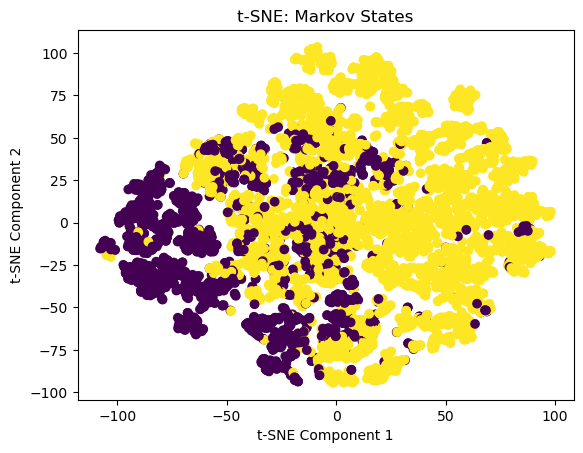

In [40]:
# 4: Dimensionality reduction and visualization
# Perform t-SNE on the microstates to obtain a 2D embedding
# perplexity refers to number of nearest neighbours chosen
embedding = TSNE(n_components=2, perplexity=11, random_state=1729).fit_transform(data)

# Plot the Markov states in the embedding
plt.scatter(embedding[:, 0], embedding[:, 1], c=tmp2)
plt.title("t-SNE: Markov States")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()


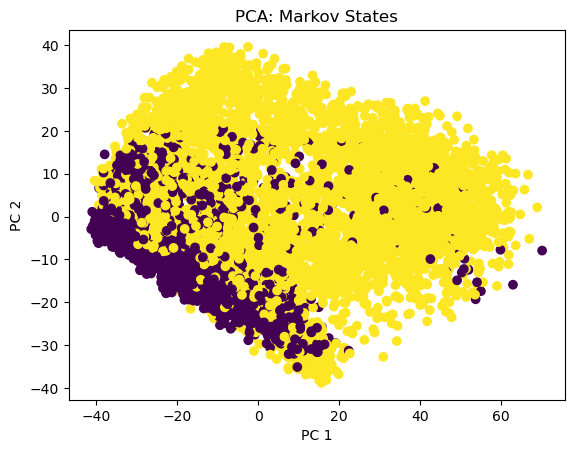

In [42]:
# 4: Dimensionality reduction and visualization
# Perform PCA on the microstates to obtain a 2D embedding

pca_vis = PCA(n_components=2)
new_centroid_positions = pca_vis.fit_transform(data)

plt.scatter(new_centroid_positions[:, 0], new_centroid_positions[:, 1], c=tmp2)
plt.title("PCA: Markov States")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()
